In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd, numpy as np, random, torch
from transformers import pipeline
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, Conv1D, GlobalMaxPool1D
from keras.optimizers import Adam
from keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns, matplotlib.pyplot as plt
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [3]:
import numpy as data
data.random.seed(42)

In [4]:
import random
random.seed(42)

In [5]:
import torch
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

In [6]:
from google.colab import drive
import pandas as pd
#drive.mount("sample_data/data_skripsi_bersih_8000.csv")
data = pd.read_csv("/content/11_9_24_10000_bersih_kamusgithub.csv")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  9897 non-null   object
dtypes: object(1)
memory usage: 78.2+ KB


In [8]:
data

,sentence
0,mantap
1,game nya bagus banget suka
2,ml anjing
3,seru main
4,aneh tiap tahunbdisuuruh adaptasi grafik baru ...
...,...
9995,ml lol kasih musuh jago gilir tim ngetrol semua
9996,woi lo kalau asih musuh tara lah tolol asih mu...
9997,gue capek main game makin capek kalah lane kal...
9998,gamenya buat lebih susah biar main tambah stre...


In [9]:
df = data
df

,sentence
0,mantap
1,game nya bagus banget suka
2,ml anjing
3,seru main
4,aneh tiap tahunbdisuuruh adaptasi grafik baru ...
...,...
9995,ml lol kasih musuh jago gilir tim ngetrol semua
9996,woi lo kalau asih musuh tara lah tolol asih mu...
9997,gue capek main game makin capek kalah lane kal...
9998,gamenya buat lebih susah biar main tambah stre...


In [10]:
# @title ROBERTA
# Memuat model
model_name = "w11wo/indonesian-roberta-base-sentiment-classifier"
sentiment_pipeline = pipeline("text-classification", model=model_name, tokenizer=model_name)

# Fungsi untuk menerapkan model dalam batch
def batch_sentiment(sentences, batch_size=32):
    results = []
    for i in range(0, len(sentences), batch_size):
        batch = sentences[i:i+batch_size]
        try:
            batch_results = sentiment_pipeline(batch)
            results.extend([item['label'] for item in batch_results])
        except Exception as e:
            print(f"Error during processing batch {i} to {i+batch_size}: {e}")
            results.extend(['error'] * len(batch))
    return results

# Pastikan bahwa semua entri di kolom 'sentence' adalah string
data['sentence'] = data['sentence'].astype(str)

# Menerapkan analisis sentimen dalam batch
data['label_from_roberta'] = batch_sentiment(data['sentence'].tolist())

# Menampilkan hasil
print(data.filter(items=['sentence', 'label_from_roberta']).head())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/808k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/467k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


                                            sentence label_from_roberta
0                                             mantap           positive
1                         game nya bagus banget suka           positive
2                                          ml anjing           negative
3                                          seru main           positive
4  aneh tiap tahunbdisuuruh adaptasi grafik baru ...           negative


In [11]:
data

,sentence,label_from_roberta
0,mantap,positive
1,game nya bagus banget suka,positive
2,ml anjing,negative
3,seru main,positive
4,aneh tiap tahunbdisuuruh adaptasi grafik baru ...,negative
...,...,...
9995,ml lol kasih musuh jago gilir tim ngetrol semua,negative
9996,woi lo kalau asih musuh tara lah tolol asih mu...,negative
9997,gue capek main game makin capek kalah lane kal...,negative
9998,gamenya buat lebih susah biar main tambah stre...,negative


In [12]:
# Save the filtered DataFrame to a CSV fi
data.to_csv("Data_Labeling.csv", index=False)

In [124]:
# Asumsi bahwa kolom dengan label sentimen dari model adalah 'label_from_roberta'
distribution_from_roberta = data['label_from_roberta'].value_counts()

# Menampilkan persentase distribusi sentimen
print(distribution_from_roberta)

label_from_roberta
negative    5887
positive    3144
neutral      969
Name: count, dtype: int64


In [126]:
# Menentukan fitur dan target
X = data['sentence']  # atau df['sentence'] jika Anda belum melakukan oversampling
y = data['label_from_roberta']  # atau df['label_from_roberta']

# Membagi data menjadi set pelatihan dan pengujian
# Proporsi pembagian adalah 70% untuk pelatihan dan 10% untuk pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran dari masing-masing set
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)
print('Data Split selesai')

Ukuran X_train: (8000,)
Ukuran X_test: (2000,)
Ukuran y_train: (8000,)
Ukuran y_test: (2000,)
Data Split selesai


# Word2vec

In [127]:
# Word2Vec Embedding
from gensim.models import Word2Vec
Embedding_dimensions = 100
Word2vec_train_data = list(map(lambda x: x.split(), X_train))

In [128]:
# Mendefinisikan model dan melatihnya.????kenapa dibikin model prinsip dari word2vec
word2vec_model = Word2Vec(Word2vec_train_data, vector_size=Embedding_dimensions, workers=8, min_count=5)
print("Vocabulary Length:", len(word2vec_model.wv.key_to_index))

Vocabulary Length: 1427


In [129]:
# Menentukan panjang input model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

input_length = 60

In [130]:
# Tokenisasi dan padding
vocab_length = 60000
tokenizer = Tokenizer(filters="", lower=True)
tokenizer.fit_on_texts(data['sentence'])
tokenizer.num_words = vocab_length
print("Tokenizer vocab length:", vocab_length)

Tokenizer vocab length: 60000


In [131]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_sequences, maxlen=input_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=input_length, padding='post')


In [132]:
# Encoding label
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
print("label yang telah dilakukan encode y_train:", y_train_encoded)
print("label yang telah dilakukan encode y_test:", y_train_encoded)


label yang telah dilakukan encode y_train: [2 2 0 ... 0 0 0]
label yang telah dilakukan encode y_test: [2 2 0 ... 0 0 0]


In [133]:
# Melakukan one-hot encoding
num_classes = 3
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=num_classes)

# Mapping label asli ke dalam bentuk string
label_mapping = {0: 'Negatif', 1: 'Netral', 2: 'Positif'}

# Fungsi untuk menampilkan beberapa contoh dari data yang sudah diencoding
def display_examples(encoded_labels, one_hot_labels, label_mapping, num_classes):
    examples = {i: None for i in range(num_classes)}
    for original, one_hot in zip(encoded_labels, one_hot_labels):
        if examples[original] is None:
            examples[original] = (original, one_hot)
        if all(value is not None for value in examples.values()):
            break

    for original, one_hot in examples.values():
        print(f"Label Asli: {label_mapping[original]} - One-Hot: {one_hot}")

# Menampilkan beberapa contoh dari y_train
print("Contoh One-Hot Encoding y_train:")
display_examples(y_train_encoded, y_train_one_hot, label_mapping, num_classes)

# Menampilkan beberapa contoh dari y_test
print("\nContoh One-Hot Encoding y_test:")
display_examples(y_test_encoded, y_test_one_hot, label_mapping, num_classes)

Contoh One-Hot Encoding y_train:
Label Asli: Negatif - One-Hot: [1. 0. 0.]
Label Asli: Netral - One-Hot: [0. 1. 0.]
Label Asli: Positif - One-Hot: [0. 0. 1.]

Contoh One-Hot Encoding y_test:
Label Asli: Negatif - One-Hot: [1. 0. 0.]
Label Asli: Netral - One-Hot: [0. 1. 0.]
Label Asli: Positif - One-Hot: [0. 0. 1.]


In [134]:
# Menampilkan bentuk dari data yang telah diproses
print("X_train_padded.shape:", X_train_padded.shape)
print("X_test_padded.shape :", X_test_padded.shape)
print("y_train_one_hot.shape:", y_train_one_hot.shape)
print("y_test_one_hot.shape :", y_test_one_hot.shape)

X_train_padded.shape: (8000, 60)
X_test_padded.shape : (2000, 60)
y_train_one_hot.shape: (8000, 3)
y_test_one_hot.shape : (2000, 3)


In [135]:
# Membuat embedding matrix
embedding_matrix = np.zeros((vocab_length, Embedding_dimensions))

for word, token in tokenizer.word_index.items():
    if token < vocab_length:
        if word in word2vec_model.wv:
            embedding_matrix[token] = word2vec_model.wv[word]

print("Embedding Matrix Shape:", embedding_matrix.shape)
for i in range(5):
    print(f"Kalimat: {data['sentence'].iloc[i]}")
    print(f"Embedding: {embedding_matrix[i]}")

Embedding Matrix Shape: (60000, 100)
Kalimat: mantap
Embedding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Kalimat: game nya bagus banget suka
Embedding: [-0.18558471  0.17715891  0.10673974 -0.11317052 -0.07897065 -0.45809475
  0.3949295   1.06716943 -0.30687484 -0.21896063  0.08118122 -0.4841077
 -0.15196204  0.21594636 -0.16365415 -0.24661596  0.14996795 -0.25692657
 -0.38637167 -0.73168772  0.2992577   0.10240366  0.05599406 -0.1123542
  0.04763582 -0.01538836 -0.07285187 -0.3028141  -0.28606215  0.25874814
  0.5039553   0.06019093  0.33138564 -0.76298892 -0.18980977  0.55621707
 -0.15036981 -0.15818867 -0.18939292 -0.63474584 -0.04397047 -0.22481352
 -0.11382734  0.06745293  0.15491086 -0.09147553  0.02058408  0.07299697
 

Model LSTM

In [136]:
import pandas as pd, numpy as np, random, torch
from transformers import pipeline
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, Conv1D, GlobalMaxPool1D
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns, matplotlib.pyplot as plt
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [137]:
# Fungsi untuk membuat model LSTM tanpa Embedding layer
def create_lstm_model():
    embedding_layer = Embedding(input_dim=vocab_length,
                                output_dim=Embedding_dimensions,
                                weights=[embedding_matrix],
                                input_length=input_length,
                                trainable=False)

    model = Sequential([
        embedding_layer,
        LSTM(100, dropout=0.3, return_sequences=True),
        LSTM(100, dropout=0.3, return_sequences=True),
        Conv1D(100, 5, activation='relu'),
        GlobalMaxPool1D(),
        Dense(16, activation='relu', kernel_regularizer=l2(0.01)),  # Menambahkan regularisasi L2
        Dropout(0.5),  # Menambahkan Dropout
        Dense(3, activation='softmax'),  # Mengubah output layer sesuai dengan jumlah kelas (3) #bedanya dimana
    ], name="Sentiment_Model")
    return model

In [138]:
training_model = create_lstm_model()
training_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "Sentiment_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_40 (Embedding)             │ ?                           │       6,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_80 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_81 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_40 (Conv1D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_40              │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,000,000 (22.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 6,000,000 (22.89 MB)

In [139]:
# Hyperparameters
batch_sizes = [16, 32, 64]
epochs = [20, 30, 40]


# Tempat untuk menyimpan hasil
best_model = None
best_batch_size = None
best_epochs = None
best_accuracy = 0
history_dict = {}

# Loop melalui kombinasi batch size dan epochs
for batch_size in batch_sizes:
    for epoch in epochs:
        print(f"Training dengan batch size {batch_size} dan epoch {epoch}")
        model = create_lstm_model()
        model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])  # Menurunkan learning rate
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  # Menambahkan kembali Early Stopping
        history = model.fit(X_train_padded, y_train_one_hot, epochs=epoch, batch_size=batch_size, verbose=1, validation_split=0.1, callbacks=[early_stopping])
        history_dict[(batch_size, epoch)] = history.history
        # Evaluasi model
        _, accuracy = model.evaluate(X_test_padded, y_test_one_hot, verbose=2)
        print(f"Akurasi untuk batch size {batch_size} dan epoch {epoch}: {accuracy}")

        # Perbarui model terbaik berdasarkan akurasi
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_batch_size = batch_size
            best_epochs = epoch
            best_model = model  # Simpan model ini sebagai model terbaik

# Tampilkan hyperparameter terbaik
print(f"Hyperparameter terbaik adalah batch size {best_batch_size} dan epochs {best_epochs} dengan akurasi {best_accuracy}")


Training dengan batch size 16 dan epoch 20
Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.5556 - loss: 1.1909 - val_accuracy: 0.6425 - val_loss: 1.0365
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6332 - loss: 1.0455 - val_accuracy: 0.6662 - val_loss: 0.9473
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6632 - loss: 0.9539 - val_accuracy: 0.6725 - val_loss: 0.8927
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6806 - loss: 0.9014 - val_accuracy: 0.6812 - val_loss: 0.8563
Epoch 5/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.6770 - loss: 0.8696 - val_accuracy: 0.6712 - val_loss: 0.8375
Epoch 6/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6916 - loss: 0.8553 - val_accuracy: 0.6787 - val_loss: 0.8090
Epoch 7/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6980 - loss: 0.8145 - val_accuracy: 0.6850 - val_loss: 0.7979
Epoch 8/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step

In [140]:
# Setelah loop, kita bisa memplot grafik untuk kombinasi terbaik
best_history = history_dict[(best_batch_size, best_epochs)]

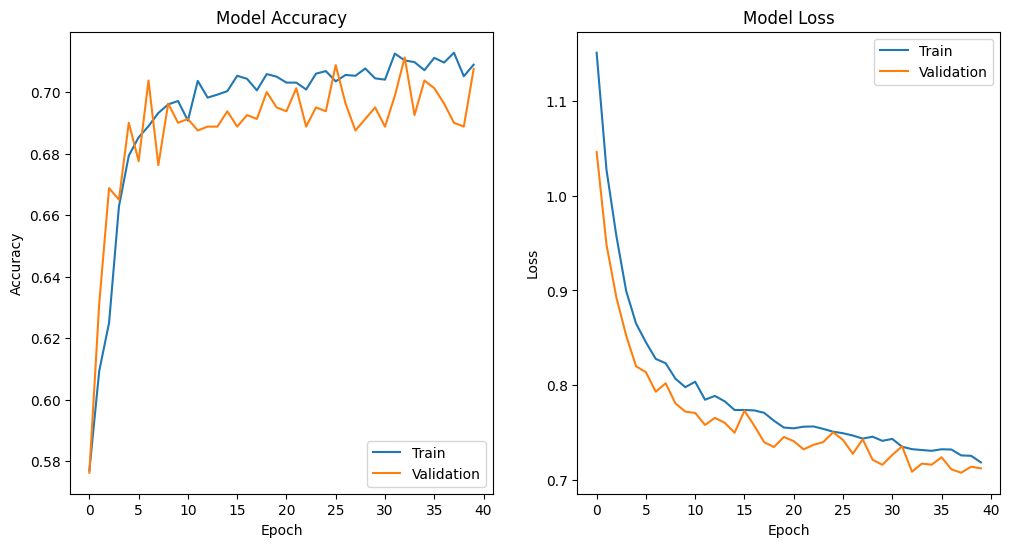

In [141]:
# Plotting the results
def plot_training_history(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train')
    plt.plot(epochs_range, val_acc, label='Validation')
    plt.legend(loc='lower right')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train')
    plt.plot(epochs_range, val_loss, label='Validation')
    plt.legend(loc='upper right')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.show()

# Contoh penggunaan plot_training_history
best_history = history_dict[(best_batch_size, best_epochs)]
plot_training_history(best_history)

In [142]:
# Evaluasi model terbaik dengan data uji
y_pred = best_model.predict(X_test_padded)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test_one_hot.argmax(axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [143]:
# Print Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

    negative       0.72      0.91      0.81      1208
     neutral       0.33      0.00      0.01       206
    positive       0.76      0.60      0.67       586

    accuracy                           0.73      2000
   macro avg       0.60      0.51      0.50      2000
weighted avg       0.69      0.73      0.68      2000



In [144]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)


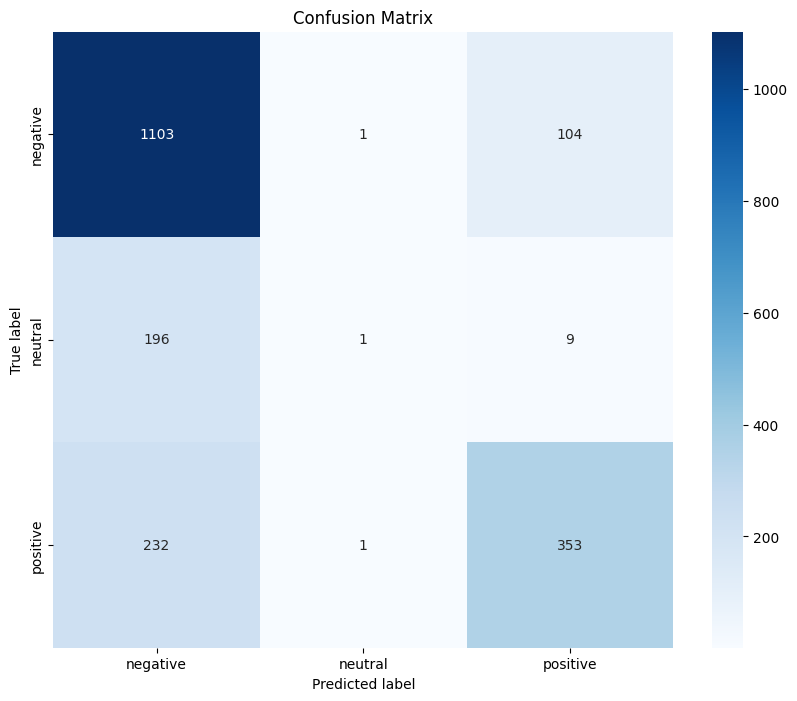

In [145]:
# Membuat heatmap dari confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [146]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


In [147]:
# Konversi data uji dan label ke bentuk yang diperlukan
X_test = [tokenizer.sequences_to_texts([sequence])[0] for sequence in X_test_padded]  # Konversi kembali ke bentuk kalimat
y_test_labels_text = label_encoder.inverse_transform(y_test_one_hot.argmax(axis=1))  # Konversi one-hot ke label asli
y_pred_labels_text = label_encoder.inverse_transform(y_pred.argmax(axis=1))  # Konversi prediksi ke label teks

# Membuat DataFrame
results_df = pd.DataFrame({
    'No': range(1, len(X_test) + 1),  # Menambahkan indeks mulai dari 1
    'Sentence': X_test,
    'True Label': y_test_labels_text,
    'Prediction': y_pred_labels_text
})

# Menetapkan opsi display untuk menampilkan DataFrame secara penuh
pd.set_option('display.max_rows', None)  # Atau batasi jumlah dengan angka tertentu
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

# Menampilkan DataFrame
print(results_df)

       No                       Sentence                      True Label Prediction
0        1                                      gem nya bagus  positive   positive 
1        2  game jelek kayak telek jangan pernah asih reti...  negative   negative 
2        3                               benerin dragg sistem  positive   negative 
3        4  hapus game nya gajelass banget gue kasih tim e...  negative   negative 
4        5  game aneh kena dark sistem mulu bukan malah ta...  negative   negative 
5        6  bang teman teman random dark sistem semua kata...   neutral   negative 
6        7                         game nya tarik dark sistem   neutral   negative 
7        8  geme sangat adilmoonton sangat bodoh mengngaju...  negative   positive 
8        9  game enggak jelas game rusakbusuk montoon busu...  negative   negative 
9       10         moonton update nya kurang nyaman enak dulu  negative   negative 
10      11  update ml ku nge stuck loading screen jadi mai...  negative   ne

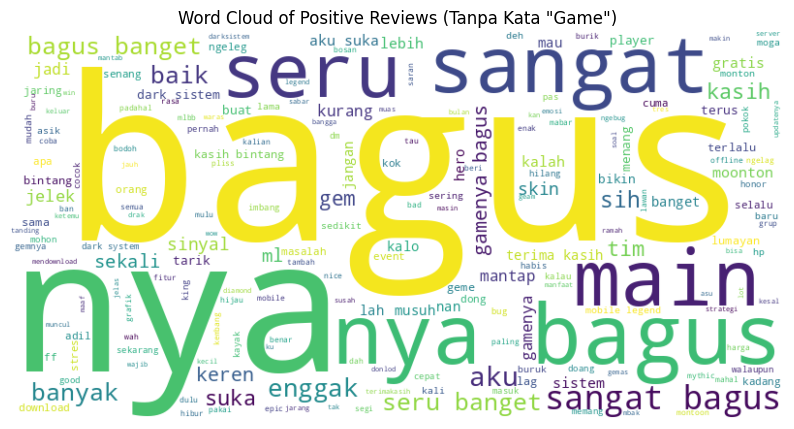

In [148]:
# Gabungkan semua ulasan positif menjadi satu teks
positive_text = ' '.join(results_df[results_df['Prediction'] == 'positive']['Sentence'].tolist())

# Tambahkan kata "game" ke daftar stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.add("game")  # Tambahkan kata yang ingin dihilangkan

# Buat Word Cloud untuk ulasan positif dengan menghilangkan kata "game"
wordcloud_positive = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords  # Gunakan stopwords yang sudah dimodifikasi
).generate(positive_text)

# Tampilkan Word Cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews (Tanpa Kata "Game")')
plt.show()

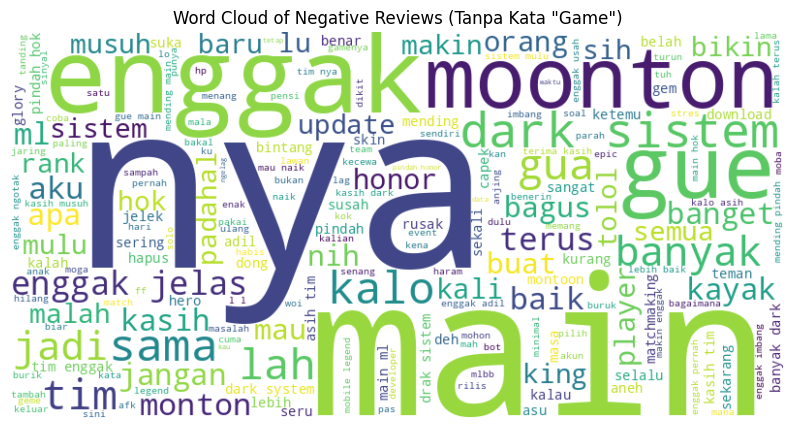

In [149]:
# Gabungkan semua ulasan negatif menjadi satu teks
negative_text = ' '.join(results_df[results_df['Prediction'] == 'negative']['Sentence'].tolist())

# Tambahkan kata "game" ke daftar stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.add("game")  # Tambahkan kata yang ingin dihilangkan

# Buat Word Cloud untuk ulasan negatif dengan menghilangkan kata "game"
wordcloud_negative = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords  # Gunakan stopwords yang sudah dimodifikasi
).generate(negative_text)

# Tampilkan Word Cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Reviews (Tanpa Kata "Game")')
plt.show()

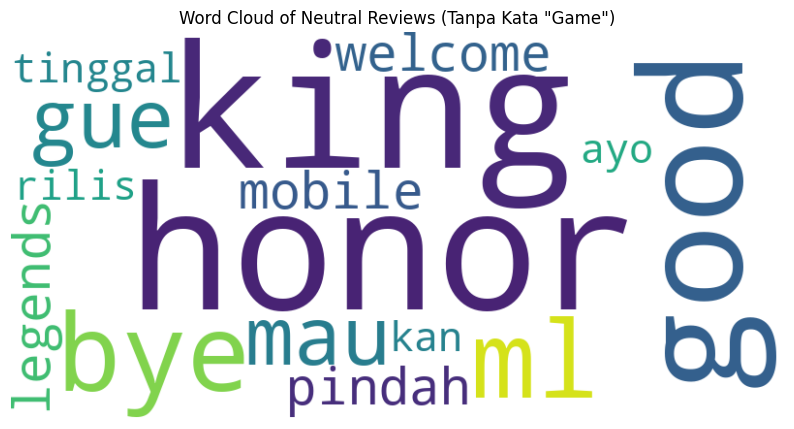

In [150]:
# Gabungkan semua ulasan netral menjadi satu teks
neutral_text = ' '.join(results_df[results_df['Prediction'] == 'neutral']['Sentence'].tolist())

# Tambahkan kata "game" ke daftar stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.add("game")  # Tambahkan kata yang ingin dihilangkan

# Buat Word Cloud untuk ulasan netral dengan menghilangkan kata "game"
wordcloud_neutral = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords  # Gunakan stopwords yang sudah dimodifikasi
).generate(neutral_text)

# Tampilkan Word Cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Neutral Reviews (Tanpa Kata "Game")')
plt.show()


# DF

In [ ]:
# Konversi data uji dan label ke bentuk yang diperlukan
X_test = [tokenizer.sequences_to_texts([sequence])[0] for sequence in X_test_padded]  # Konversi kembali ke bentuk kalimat
y_test_labels_text = label_encoder.inverse_transform(y_test_one_hot.argmax(axis=1))  # Konversi one-hot ke label asli
y_pred_labels_text = label_encoder.inverse_transform(y_pred.argmax(axis=1))  # Konversi prediksi ke label teks

# Membuat DataFrame
results_df = pd.DataFrame({
    'No': range(1, len(X_test) + 1),  # Menambahkan indeks mulai dari 1
    'Sentence': X_test,
    'True Label': y_test_labels_text,
    'Prediction': y_pred_labels_text
})

# Menetapkan opsi display untuk menampilkan DataFrame secara penuh
pd.set_option('display.max_rows', None)  # Atau batasi jumlah dengan angka tertentu
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

# Menampilkan DataFrame
print(results_df)

       No                       Sentence                      True Label Prediction
0        1                                      gem nya bagus  positive   positive 
1        2  game jelek kayak telek jangan pernah asih reti...  negative   negative 
2        3                               benerin dragg sistem  positive   negative 
3        4  hapus game nya gajelass banget gue kasih tim e...  negative   negative 
4        5  game aneh kena dark sistem mulu bukan malah ta...  negative   negative 
5        6  bang teman teman random dark sistem semua kata...   neutral   negative 
6        7                         game nya tarik dark sistem   neutral   negative 
7        8  geme sangat adilmoonton sangat bodoh mengngaju...  negative   positive 
8        9  game enggak jelas game rusakbusuk montoon busu...  negative   negative 
9       10         moonton update nya kurang nyaman enak dulu  negative   negative 
10      11  update ml ku nge stuck loading screen jadi mai...  negative   ne

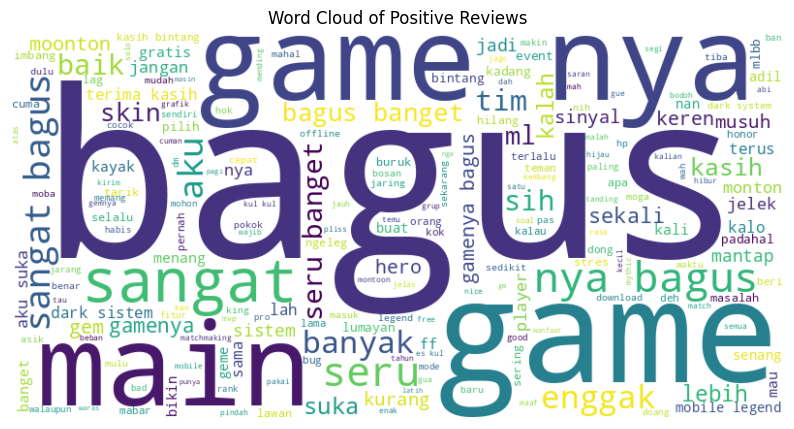

In [ ]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Membuat word cloud untuk ulasan positif dan negatif secara terpisah
positive_text = ' '.join(results_df[results_df['Prediction'] == 'positive']['Sentence'].tolist())
negative_text = ' '.join(results_df[results_df['Prediction'] == 'negative']['Sentence'].tolist())

# Word Cloud untuk ulasan positif
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')
plt.show()



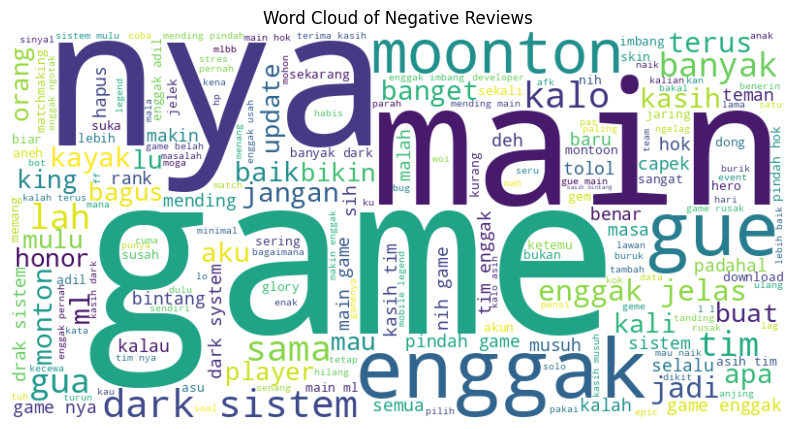

In [ ]:
# Word Cloud untuk ulasan negatif
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Reviews')
plt.show()

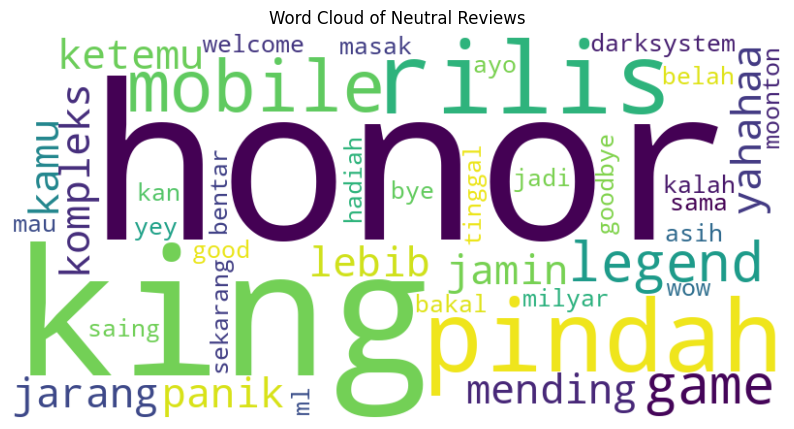

In [ ]:
# Membuat word cloud untuk ulasan positif dan negatif secara terpisah
neutral_text = ' '.join(results_df[results_df['Prediction'] == 'neutral']['Sentence'].tolist())

# Word Cloud untuk ulasan positif
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Neutral Reviews')
plt.show()

In [ ]:
# Save the filtered DataFrame to a CSV fi
data.to_csv("Data_frame_2_label.csv", index=False)

In [ ]:
import tensorflow as tf

# Menyimpan model LSTM ke file HDF5
best_model.save('best_model.h5')  # Menyimpan dalam format HDF5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pickle

# Misalnya tokenizer dan label_encoder sudah didefinisikan
# tokenizer = ...
# label_encoder = ...

# Menyimpan tokenizer dengan pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Menyimpan label_encoder dengan pickle
with open('label_encoder.pickle', 'wb') as handle:
    pickle.dump(label_encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
import tensorflow as tf

# Memuat model LSTM dari file HDF5
best_model = tf.keras.models.load_model('best_model.h5')


In [ ]:
import pickle

# Memuat tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Memuat label_encoder
with open('label_encoder.pickle', 'rb') as handle:
    label_encoder = pickle.load(handle)


In [ ]:
# Konversi data uji dan label ke bentuk yang diperlukan
X_test = [tokenizer.sequences_to_texts([sequence])[0] for sequence in X_test_padded]  # Konversi kembali ke bentuk kalimat
y_test_labels_text = label_encoder.inverse_transform(y_test_one_hot.argmax(axis=1))  # Konversi one-hot ke label asli
y_pred_labels_text = label_encoder.inverse_transform(y_pred.argmax(axis=1))  # Konversi prediksi ke label teks

# Membuat DataFrame
results_df = pd.DataFrame({
    'No': range(1, len(X_test) + 1),  # Menambahkan indeks mulai dari 1
    'Sentence': X_test,
    'True Label': y_test_labels_text,
    'Prediction': y_pred_labels_text
})

# Menetapkan opsi display untuk menampilkan DataFrame secara penuh
pd.set_option('display.max_rows', None)  # Atau batasi jumlah dengan angka tertentu
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

# Menampilkan DataFrame
print(results_df)

# Menyimpan DataFrame ke file CSV
results_df.to_csv('dataframe_2 label.csv', index=False)


      No                       Sentence                      True Label Prediction
0       1                                      gem nya bagus  positive   positive 
1       2  game jelek kayak telek jangan pernah asih reti...  negative   negative 
2       3                               benerin dragg sistem  positive   negative 
3       4  hapus game nya gajelass banget gue kasih tim e...  negative   negative 
4       5  game aneh kena dark sistem mulu bukan malah ta...  negative   negative 
5       6  bang teman teman random dark sistem semua kata...   neutral   negative 
6       7                         game nya tarik dark sistem   neutral   negative 
7       8  geme sangat adilmoonton sangat bodoh mengngaju...  negative   positive 
8       9  game enggak jelas game rusakbusuk montoon busu...  negative   negative 
9      10         moonton update nya kurang nyaman enak dulu  negative   negative 
10     11  update ml ku nge stuck loading screen jadi mai...  negative   negative 
11  

In [ ]:
# Mencari kalimat yang mengandung frase "aplikasi jelek"
search_query = "jelek"
matching_sentences = results_df[results_df['Sentence'].str.contains(search_query, case=False, na=False)]

# Menampilkan hasil yang cocok
print(matching_sentences)


     No                       Sentence                      True Label Prediction
1      2  game jelek kayak telek jangan pernah asih reti...  negative   negative 
20    21                                         game jelek  negative   negative 
50    51                                       update jelek  negative   negative 
73    74       geme jelek buruk losttric mulu tadi keel deh  negative   negative 
98    99  kocak kocak tim musuh spek iposerer qionik tim...  negative   negative 
112  113                                   update jelek gue  negative   negative 
126  127  jaring buruk mulu padahal hp bagus game jelek ...  negative   negative 
130  131  jelek minimal kasih playernya menang kali kaya...  negative   negative 
144  145  gameee anehh jaring leg leg gir loby bagus tan...  negative   negative 
175  176  game jelek dikit mute minggu mute bagus pindah...  negative   negative 
217  218  game jelek banget waktu main enggak pernah tim...  negative   negative 
256  257  update

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict_new_sentence(tokenizer, word2vec_model, lstm_model, label_encoder, sentence, input_length, embedding_dim):
    # Langkah 1: Tokenisasi kalimat
    sequence = tokenizer.texts_to_sequences([sentence])
    padded_sequence = pad_sequences(sequence, maxlen=input_length, padding='post')

    # Langkah 2: Konversi kalimat ke vektor Word2Vec
    word_vectors = [word2vec_model.wv[word] for word in sentence.split() if word in word2vec_model.wv]
    if word_vectors:
        sentence_vector = np.mean(word_vectors, axis=0).reshape(1, -1)
    else:
        sentence_vector = np.zeros((1, embedding_dim))

    # Langkah 3: Tidak perlu reshaping untuk LSTM
    sentence_vector = sentence_vector.reshape((1, input_length, embedding_dim))

    # Langkah 4: Gunakan model LSTM untuk prediksi
    predictions = lstm_model.predict(sentence_vector)

    # Langkah 5: Ubah prediksi dari one-hot encoding ke label teks
    predicted_label_text = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

    return predicted_label_text[0]

# Fungsi tambahan untuk mengekstrak fitur Word2Vec
def vectorize_sentence(word2vec_model, sentence, embedding_dim):
    word_vectors = [word2vec_model.wv[word] for word in sentence.split() if word in word2vec_model.wv]
    if word_vectors:
        vector = np.mean(word_vectors, axis=0)
    else:
        vector = np.zeros(embedding_dim)
    return vector


In [ ]:
# Fungsi prediksi sederhana
def simple_predict(sentence):
    return predict_new_sentence(word2vec_model, best_model, label_encoder, sentence)

In [ ]:
# Membuat prediksi untuk kalimat baru
predicted_label = simple_predict("mobile legend")
print(f"Prediksi sentimen untuk 'mobile legend': {predicted_label}")

TypeError: predict_new_sentence() missing 3 required positional arguments: 'sentence', 'input_length', and 'embedding_dim'

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# Misalkan tokenizer, word2vec_model, lstm_model, dan label_encoder telah dilatih sebelumnya
# Dan misalkan input_length dan embedding_dim telah ditentukan
input_length = 60  # Sesuaikan dengan panjang input maksimum yang digunakan saat melatih model LSTM
embedding_dim = 100  # Sesuaikan dengan dimensi embedding yang digunakan dalam model Word2Vec

# Fungsi prediksi kalimat baru menggunakan Word2Vec dan LSTM
def predict_new_sentence(tokenizer, word2vec_model, create_lstm_model, label_encoder, sentence, input_length, embedding_dim):
    # Langkah 1: Tokenisasi kalimat
    sequence = tokenizer.texts_to_sequences([sentence])
    padded_sequence = pad_sequences(sequence, maxlen=input_length, padding='post')

    # Langkah 2: Konversi kalimat ke vektor Word2Vec
    word_vectors = [word2vec_model.wv[word] for word in sentence.split() if word in word2vec_model.wv]
    if word_vectors:
        sentence_vector = np.mean(word_vectors, axis=0).reshape(1, -1)
    else:
        sentence_vector = np.zeros((1, embedding_dim))

    # Langkah 3: Reshape vektor agar sesuai dengan input LSTM
    sentence_vector = sentence_vector.reshape((1, input_length, embedding_dim))

    # Langkah 4: Gunakan model LSTM untuk prediksi
    predictions = lstm_model.predict(sentence_vector)

    # Langkah 5: Ubah prediksi dari one-hot encoding ke label teks
    predicted_label_text = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

    return predicted_label_text[0]

# Fungsi prediksi sederhana
def simple_predict(sentence):
    return predict_new_sentence(tokenizer, word2vec_model, lstm_model, label_encoder, sentence, input_length, embedding_dim)

# Membuat prediksi untuk kalimat baru
predicted_label = simple_predict("mobile legend")
print(f"Prediksi sentimen untuk 'mobile legend': {predicted_label}")


In [ ]:
import pickle

# Untuk model TensorFlow/Keras
best_model.save('best_model.pkl')

# Untuk tokenizer dan label_encoder dengan pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('label_encoder.pickle', 'wb') as handle:
    pickle.dump(label_encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
Penjelasan Perubahan:
Learning Rate: Menurunkan learning rate pada optimizer Adam (learning_rate=0.0001).
Regularisasi L2: Menambahkan L2 regularization pada lapisan Dense (kernel_regularizer=l2(0.01)).
Dropout: Menambahkan lapisan Dropout setelah lapisan Dense (Dropout(0.5)).
Early Stopping: Menambahkan kembali callback EarlyStopping.

# Bag Of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
# Inisialisasi CountVectorizer
vectorizer = CountVectorizer()

# Fit dan transform data pelatihan
X_train_bow = vectorizer.fit_transform(X_train)

# Transform data pengujian
X_test_bow = vectorizer.transform(X_test)

# Menampilkan ukuran dari Bag of Words
print("Ukuran X_train_bow:", X_train_bow.shape)
print("Ukuran X_test_bow:", X_test_bow.shape)

Ukuran X_train_bow: (7000, 8287)
Ukuran X_test_bow: (3000, 8287)


In [ ]:
# Mengubah label string menjadi angka
label_encoder = LabelEncoder()
y_train_numBOW = label_encoder.fit_transform(y_train)
y_test_numBOW = label_encoder.transform(y_test)

In [ ]:
# Mengubah label menjadi one-hot encoding
y_train_one_hotBOW = to_categorical(y_train_numBOW)
y_test_one_hotBOW = to_categorical(y_test_numBOW)

In [ ]:
# Menentukan parameter untuk Embedding
vocab_length = len(vectorizer.vocabulary_) + 1  # Menambahkan 1 untuk padding token
embedding_dimensions = 100
input_length = X_train_bow.shape[1]  # Panjang input adalah jumlah fitur dari BoW


In [ ]:
# Membuat embedding matrix
embedding_matrix = np.zeros((vocab_length, embedding_dimensions))

In [ ]:
embedding_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

LSTM

In [ ]:
# Membuat model LSTM sesuai dengan struktur yang diberikan
def create_lstm_modelBOW():
    embedding_layer = Embedding(input_dim=vocab_length,
                                output_dim=embedding_dimensions,
                                weights=[embedding_matrix],
                                input_length=input_length,
                                trainable=False)

    model = Sequential([
        embedding_layer,
        LSTM(100, dropout=0.3, return_sequences=True),
        LSTM(100, dropout=0.3, return_sequences=True),
        Conv1D(100, 5, activation='relu'),
        GlobalMaxPool1D(),
        Dense(16, activation='relu', kernel_regularizer=l2(0.01)),  # Menambahkan regularisasi L2
        Dropout(0.5),  # Menambahkan Dropout
        Dense(3, activation='softmax'),  # Mengubah output layer sesuai dengan jumlah kelas (3)
    ], name="Sentiment_Model")
    return model

In [ ]:
training_model = create_lstm_modelBOW()
training_model.summary()

Model: "Sentiment_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 8287, 100)         828800    
                                                                 
 lstm (LSTM)                 (None, 8287, 100)         80400     
                                                                 
 lstm_1 (LSTM)               (None, 8287, 100)         80400     
                                                                 
 conv1d (Conv1D)             (None, 8283, 100)         50100     
                                                                 
 global_max_pooling1d (Glob  (None, 100)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 16)                1616      
                                                   

In [ ]:
pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


lama

In [ ]:
# Hyperparameters
batch_sizes = [16]
epochs = [10]

# Tempat untuk menyimpan hasil
best_model = None
best_batch_size = None
best_epochs = None
best_accuracy = 0
history_dict = {}

# Memisahkan set validasi dari set pelatihan
X_train_bow, X_val_bow, y_train_one_hotBOW, y_val_one_hot = train_test_split(X_train_bow, y_train_one_hotBOW, test_size=0.1, random_state=42)

# Loop melalui kombinasi batch size dan epochs
for batch_size in batch_sizes:
    for epoch in epochs:
        print(f"Training dengan batch size {batch_size} dan epoch {epoch}")
        model = create_lstm_modelBOW()
        model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])  # Menurunkan learning rate
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  # Menambahkan Early Stopping

        history = model.fit(X_train_bow.toarray(), y_train_one_hotBOW, epochs=epoch, batch_size=batch_size, verbose=1, validation_data=(X_val_bow.toarray(), y_val_one_hot), callbacks=[early_stopping])
        history_dict[(batch_size, epoch)] = history.history

        # Evaluasi model
        _, accuracy = model.evaluate(X_test_bow.toarray(), y_test_one_hotBOW, verbose=2)
        print(f"Akurasi untuk batch size {batch_size} dan epoch {epoch}: {accuracy}")

        # Perbarui model terbaik berdasarkan akurasi
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_batch_size = batch_size
            best_epochs = epoch
            best_model = model  # Simpan model ini sebagai model terbaik

# Tampilkan hyperparameter terbaik
print(f"Hyperparameter terbaik adalah batch size {best_batch_size} dan epochs {best_epochs} dengan akurasi {best_accuracy}")

# Evaluasi akhir dengan hyperparameter terbaik pada seluruh data
print("Evaluasi akhir dengan hyperparameter terbaik...")
best_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
final_loss, final_accuracy = best_model.evaluate(X_test_bow.toarray(), y_test_one_hotBOW, verbose=2)
print(f"Final Loss: {final_loss}")
print(f"Final Accuracy: {final_accuracy}")

Training dengan batch size 16 dan epoch 10
Epoch 1/10
394/394 [==============================] - 10318s 26s/step - loss: 1.3015 - accuracy: 0.5611 - val_loss: 1.2424 - val_accuracy: 0.5543
Epoch 2/10
394/394 [==============================] - 10201s 26s/step - loss: 1.1968 - accuracy: 0.5662 - val_loss: 1.1593 - val_accuracy: 0.5543
Epoch 3/10
 33/394 [=>............................] - ETA: 2:34:29 - loss: 1.1554 - accuracy: 0.5701

In [ ]:
# Setelah loop, kita bisa memplot grafik untuk kombinasi terbaik
best_history = history_dict[(best_batch_size, best_epochs)]

In [ ]:
# Plotting the results
def plot_training_history(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train')
    plt.plot(epochs_range, val_acc, label='Validation')
    plt.legend(loc='lower right')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train')
    plt.plot(epochs_range, val_loss, label='Validation')
    plt.legend(loc='upper right')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.show()

# Contoh penggunaan plot_training_history
best_history = history_dict[(best_batch_size, best_epochs)]
plot_training_history(best_history)

In [ ]:
# membuat prediksi
y_pred = best_model.predict(X_test_padded)

In [ ]:
# Mengonversi prediksi dari one-hot encoding ke label
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_one_hot, axis=1)

In [ ]:
# Mengonversi label numerik kembali ke teks
y_test_labels_text = label_encoder.inverse_transform(y_test_labels)
y_pred_labels_text = label_encoder.inverse_transform(y_pred_labels)

# Menghitung metrik performa dengan label teks
print("Classification Report:")
print(classification_report(y_test_labels_text, y_pred_labels_text))

# Membuat confusion matrix dengan label teks
cm = confusion_matrix(y_test_labels_text, y_pred_labels_text)

In [ ]:
# Membuat heatmap dari confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
# Membuat DataFrame
results_df = pd.DataFrame({
    'No': range(1, len(X_test) + 1),  # Menambahkan indeks mulai dari 1
    'Sentence': X_test,
    'True Label': y_test_labels_text,
    'Prediction': y_pred_labels_text
})

# Menetapkan opsi display untuk menampilkan DataFrame secara penuh
pd.set_option('display.max_rows', None)  # Atau batasi jumlah dengan angka tertentu
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

# Menampilkan DataFrame
print(results_df)